# Margin Trading & Levered Returns

Definition: "Margin trading refers to the practice of using borrowed funds from a broker to trade a financial asset, which forms the collateral for the loan from the broker." (Investopedia.com)

In simple words: investors don't pay the full price but they get the full benefit (minus borrowing costs)

It's a two edged sword: **leverage amplifies both gains and losses.**
<br>
In the event of a loss, the collateral gets reduced and the investor either posts additional margin or the broker closes the position (margin call).

**Example**

A trader buys a stock (\\$100) on margin (50%). After one day the price increases to \\$110.
<br>
Calculate the unlevered return and levered return.

In [7]:
import numpy as np

In [1]:
p0 = 100
p1 = 110
leverage = 2
margin = p0 / 2

In [2]:
margin

50.0

In [3]:
unlev_return = (p1 - p0) / p0 # simple return
unlev_return

0.1

In [4]:
lev_return = (p1 - p0) / margin # simple return
lev_return

0.2

In [5]:
lev_return == unlev_return * leverage # this relationship is true for simple returns

True

In [10]:
unlev_return = np.log((p1 - p0) / p0 + 1) # log returns
unlev_return

0.09531017980432493

In [11]:
lev_return = np.log((p1 - p0) / margin + 1) # log returns
lev_return

0.1823215567939546

In [9]:
lev_return == unlev_return * leverage # this relationship is NOT true for log returns

False

**Take home: to calculate levered returns, don't multiply leverage with log returns.**

## Levered Returns

**Hypothesis: for (highly) profitable investment, the more leverage the better.**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [13]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003050
2014-10-03,46.090000,0.007212
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012150
...,...,...
2021-05-24,250.779999,0.022882
2021-05-25,251.720001,0.003748
2021-05-26,251.490005,-0.000914


In [14]:
msft["Simple_Ret"] = msft.Price.pct_change() # simple returns
msft

,Price,Returns,Simple_Ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003050
2014-10-03,46.090000,0.007212,0.007212
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012150
...,...,...,...
2021-05-24,250.779999,0.022882,0.022882
2021-05-25,251.720001,0.003748,0.003748
2021-05-26,251.490005,-0.000914,-0.000914


In [25]:
leverage = 7

(Simplified) Assumptions:
- restore leverage on a daily basis (by buying/selling shares)
- no trading costs
- no borrowing costs

In [32]:
msft["Lev_Returns"] = msft.Simple_Ret.mul(leverage) # levered simple returns
msft

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-10-01,45.900002,NaN,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003050,-0.021351
2014-10-03,46.090000,0.007212,0.007212,0.050481
2014-10-06,46.090000,0.000000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012150,-0.085051
...,...,...,...,...
2021-05-24,250.779999,0.022882,0.022882,0.160175
2021-05-25,251.720001,0.003748,0.003748,0.026238
2021-05-26,251.490005,-0.000914,-0.000914,-0.006396


In [33]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"]) # limit loss to 100%

<Axes: xlabel='Date'>

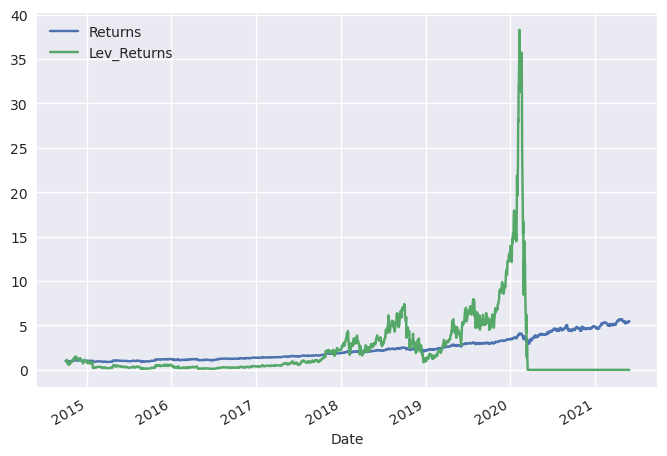

In [34]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot()

In [35]:
msft.Simple_Ret.max()

0.14216888119914373

In [36]:
msft.Lev_Returns.max()

0.9951821683940061

In [37]:
msft.Simple_Ret.min()

-0.1473903128642552

In [38]:
msft.Lev_Returns.min()

-1.0

**What happens when leverage greater than ...?**

In [24]:
-1 / msft.Simple_Ret.min()

6.784706406865346

**Take home:**
1. with leverage you can (theoretically) lose more than the initial margin (in practice: margin call/margin closeout before)
2. even for (highly) profitable instruments the hypothesis **"the more leverage the better**" does not hold
3. it's a two edged (**non-symmetrical**) sword: leverage amplifies losses more than it amplifies gains